<a href="https://colab.research.google.com/github/irfannhkm/PCVK_GANJIL_24-25/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

Import library dan load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image

## 1. Buat Gamma Correction

Gamma Correction pada citra
---------------------------
Masukkan nilai gamma: 3


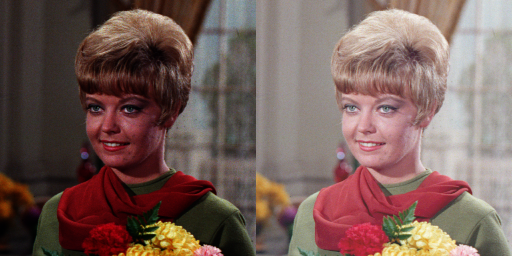

In [ ]:
print('Gamma Correction pada citra')
print('---------------------------')
try:
  gamma = int(input('Masukkan nilai gamma: '))
except ValueError:
  print('Nilai gamma harus berupa bilangan bulat')

original = cv.imread('/content/drive/MyDrive/female.tiff')
result = original.copy()

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      result[y,x,c] = 255*(original[y,x,c]/255)**(1/gamma)

final_frame = cv.hconcat([original, result])
cv2_imshow(final_frame)


## 2. Buat Simulasi Image Depth

Simulasi Image Depth
---------------------


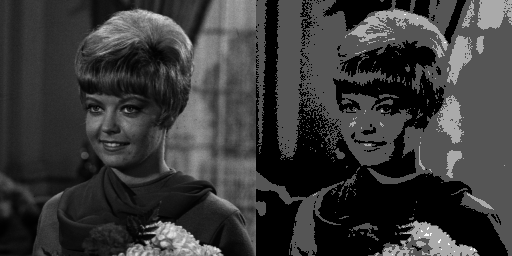

In [ ]:
print('Simulasi Image Depth')
print('---------------------')

bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.round(original[y,x]/level)*level

final_frame = cv.hconcat([original, depth_image])
cv2_imshow(final_frame)

## 3. Buat modul Average Denoising

Melakukan load pada image asli dan image noises

In [ ]:
import glob

# Load image citra asli
ori_img = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Load image 100 Citra dengan Gaussian Noise
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    if n is not None:
        cv_img.append(n)

print(f"Total gambar yang di load: {len(cv_img)}")

# Fungsi untuk menghitung MSE (Mean Squared Error)
def hitung_mse(ori_img, denoised_img):
    mse = np.mean((ori_img.astype(np.float32) - denoised_img.astype(np.float32)) ** 2)
    return mse

# Fungsi untuk menghitung PSNR
def hitung_psnr(ori_img, denoised_img):
    mse = hitung_mse(ori_img, denoised_img)
    if mse == 0:  # Jika gambar identik
        return float('inf')

    nilai_piksel_maks = 255.0
    psnr = 10 * np.log10((nilai_piksel_maks ** 2) / mse)
    return psnr

Total gambar yang di load: 100


### Jumlah citra 5

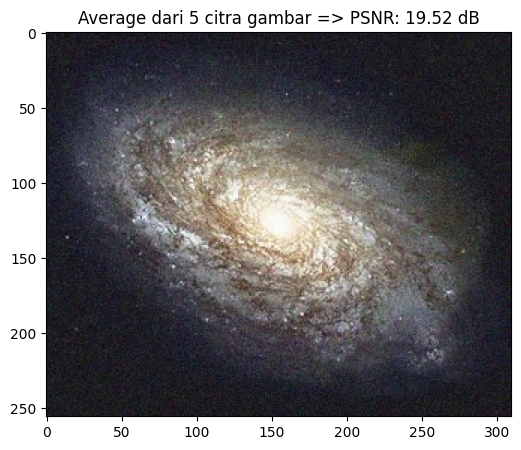

In [ ]:
### Jumlah citra 5 ###
avg_5 = np.zeros_like(cv_img[0], dtype=np.float32)

for i in range(5):
    avg_5 += cv_img[i].astype(np.float32)

avg_5 /= 5
avg_5 = np.clip(avg_5, 0, 255).astype(np.uint8)
psnr_5 = hitung_psnr(ori_img, avg_5)

# Menampilkan hasil untuk 5 citra
plt.figure(figsize=(6, 6))
plt.imshow(cv.cvtColor(avg_5, cv.COLOR_BGR2RGB))
plt.title(f"Average dari 5 citra gambar => PSNR: {psnr_5:.2f} dB")
plt.show()

### Jumlah citra 10

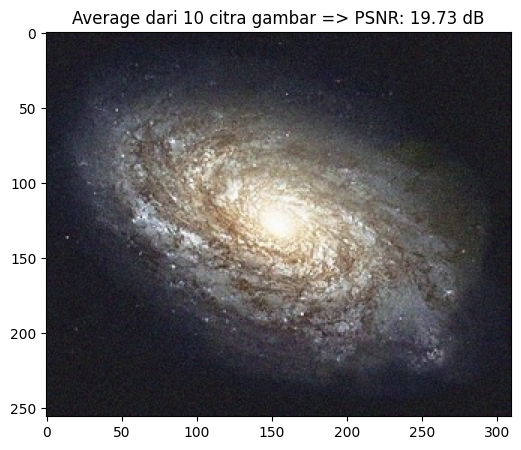

In [ ]:
### Jumlah citra 10 ###
avg_10 = np.zeros_like(cv_img[0], dtype=np.float32)

for i in range(10):
    avg_10 += cv_img[i].astype(np.float32)

avg_10 /= 10
avg_10 = np.clip(avg_10, 0, 255).astype(np.uint8)
psnr_10 = hitung_psnr(ori_img, avg_10)

# Menampilkan hasil untuk 10 citra
plt.figure(figsize=(6, 6))
plt.imshow(cv.cvtColor(avg_10, cv.COLOR_BGR2RGB))
plt.title(f"Average dari 10 citra gambar => PSNR: {psnr_10:.2f} dB")
plt.show()


### Jumlah citra 20

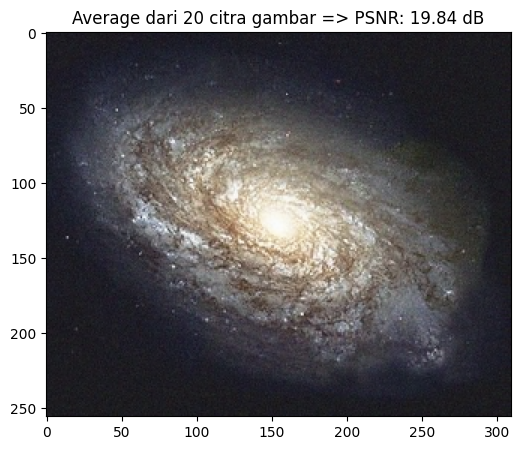

In [ ]:
### Jumlah citra 20 ###
avg_20 = np.zeros_like(cv_img[0], dtype=np.float32)

for i in range(20):
    avg_20 += cv_img[i].astype(np.float32)

avg_20 /= 20
avg_20 = np.clip(avg_20, 0, 255).astype(np.uint8)
psnr_20 = hitung_psnr(ori_img, avg_20)

# Menampilkan hasil untuk 20 citra
plt.figure(figsize=(6, 6))
plt.imshow(cv.cvtColor(avg_20, cv.COLOR_BGR2RGB))
plt.title(f"Average dari 20 citra gambar => PSNR: {psnr_20:.2f} dB")
plt.show()

### Jumlah citra 40

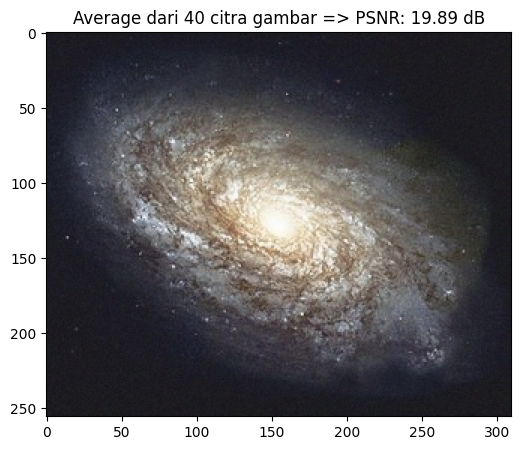

In [ ]:
### Jumlah citra 40 ###
avg_40 = np.zeros_like(cv_img[0], dtype=np.float32)

for i in range(40):
    avg_40 += cv_img[i].astype(np.float32)

avg_40 /= 40
avg_40 = np.clip(avg_40, 0, 255).astype(np.uint8)
psnr_40 = hitung_psnr(ori_img, avg_40)

# Menampilkan hasil untuk 40 citra
plt.figure(figsize=(6, 6))
plt.imshow(cv.cvtColor(avg_40, cv.COLOR_BGR2RGB))
plt.title(f"Average dari 40 citra gambar => PSNR: {psnr_40:.2f} dB")
plt.show()

### Jumlah citra 80

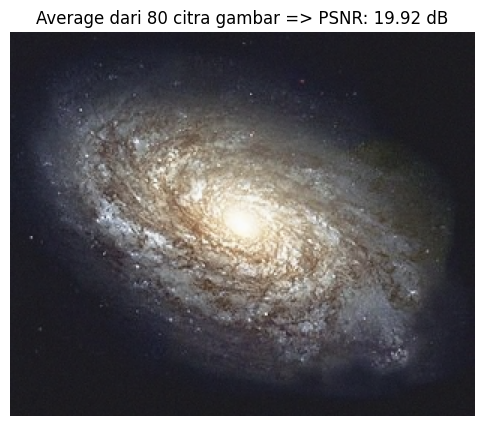

In [ ]:
### Jumlah citra 80 ###
avg_80 = np.zeros_like(cv_img[0], dtype=np.float32)

for i in range(80):
    avg_80 += cv_img[i].astype(np.float32)

avg_80 /= 80
avg_80 = np.clip(avg_80, 0, 255).astype(np.uint8)
psnr_80 = hitung_psnr(ori_img, avg_80)

# Menampilkan hasil untuk 80 citra
plt.figure(figsize=(6, 6))
plt.imshow(cv.cvtColor(avg_80, cv.COLOR_BGR2RGB))
plt.title(f"Average dari 80 citra gambar => PSNR: {psnr_80:.2f} dB")
plt.axis('off')
plt.show()

### Jumlah citra 100

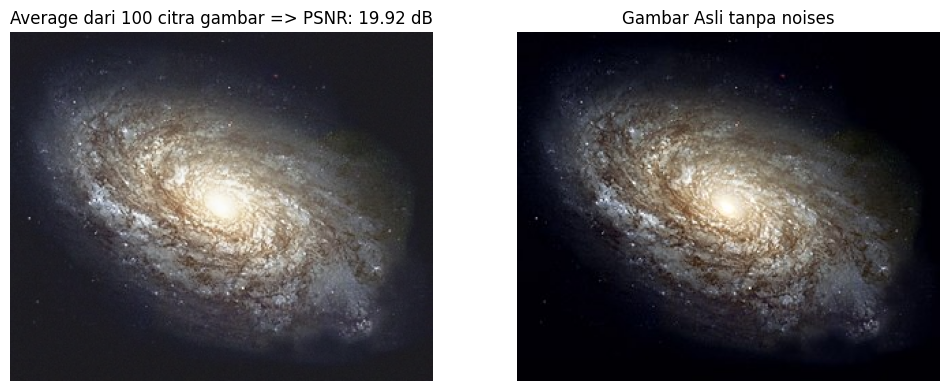

In [ ]:
from typing import final
### Jumlah citra 100 ###
avg_100 = np.zeros_like(cv_img[0], dtype=np.float32)

for i in range(100):
    avg_100 += cv_img[i].astype(np.float32)

avg_100 /= 100
avg_100 = np.clip(avg_100, 0, 255).astype(np.uint8)
psnr_100 = hitung_psnr(ori_img, avg_100)

# Menampilkan hasil untuk 100 citra
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(avg_100, cv.COLOR_BGR2RGB))
plt.title(f"Average dari 100 citra gambar => PSNR: {psnr_100:.2f} dB")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(ori_img, cv.COLOR_BGR2RGB))
plt.title("Gambar Asli tanpa noises")
plt.axis('off')
plt.show()

In [ ]:
# Menampilkan dalam bentuk tabel
print("Jumlah Citra\t| PSNR")
print("-----------------------")
print(f"5\t\t| {psnr_5:.2f}")
print(f"10\t\t| {psnr_10:.2f}")
print(f"20\t\t| {psnr_20:.2f}")
print(f"40\t\t| {psnr_40:.2f}")
print(f"80\t\t| {psnr_80:.2f}")
print(f"100\t\t| {psnr_100:.2f}")

Jumlah Citra	| PSNR
-----------------------
5		| 19.52
10		| 19.73
20		| 19.84
40		| 19.89
80		| 19.92
100		| 19.92


**Kesimpulan dari hasil PSNR (Peak Signal-to-Noise Ratio)**:

- Semakin banyak jumlah citra yang digunakan dalam proses averaging (rata-rata), nilai PSNR sedikit demi sedikit meningkat. Ini menunjukkan bahwa dengan menambahkan lebih banyak citra, hasil citra yang diperoleh semakin mendekati kualitas citra asli tanpa noise. Hal ini dapat memperbaiki kualitas citra dan noise pada citra semakin berkurang.

- Dari hasil yang ditampilkan, proses averaging hingga 100 citra menghasilkan PSNR sekitar 19.92 dB. Ini berarti pengurangan noise efektif dengan kualitas hasil citra cukup baik, tetapi mengorbankan sedikit detail dan ketajamannya.

## 4. Buat image masking untuk image berikut.

### Gambar 1: Full wajah

(488, 800, 3)


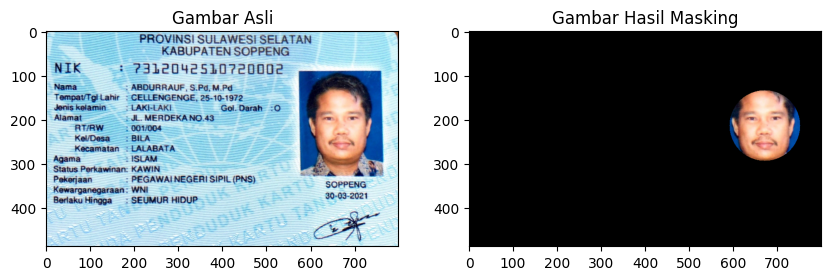

In [ ]:
ktp_image = cv.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg')

# Membuat masking bulat (circle) untuk gambar kanan
height, width, _ = ktp_image.shape
print(ktp_image.shape)
mask = np.zeros((height, width), dtype=np.uint8)

# Membuat lingkaran di koordinat tertentu (atur berdasarkan kebutuhan)
# Contoh untuk kelompok 1 dan 2
cv.circle(mask, (width - 130, height // 2 - 30), 80, 255, -1)

# masking dengan operasi AND
masked_image = cv.bitwise_and(ktp_image, ktp_image, mask=mask)

# Menampilkan gambar asli dan hasil masking
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ktp_image, cv.COLOR_BGR2RGB))
plt.title("Gambar Asli")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(masked_image, cv.COLOR_BGR2RGB))
plt.title("Gambar Hasil Masking")
plt.show()


### Gambar 2: Hidung

(488, 800, 3)


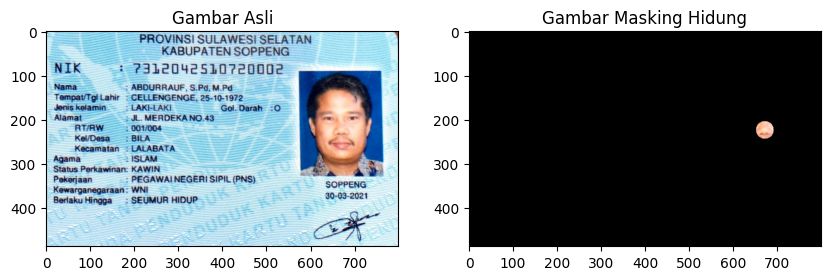

In [ ]:
ktp_image = cv.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg')

# Membuat masking bulat (circle) untuk gambar kanan
height, width, _ = ktp_image.shape
print(ktp_image.shape)
mask = np.zeros((height, width), dtype=np.uint8)

# Membuat lingkaran di koordinat tertentu (atur berdasarkan kebutuhan)
# Contoh untuk kelompok 1 dan 2
cv.circle(mask, (width - 130, height // 2 - 20), 20, 255, -1)

# masking dengan operasi AND
masked_image = cv.bitwise_and(ktp_image, ktp_image, mask=mask)

# Menampilkan gambar asli dan hasil masking
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ktp_image, cv.COLOR_BGR2RGB))
plt.title("Gambar Asli")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(masked_image, cv.COLOR_BGR2RGB))
plt.title("Gambar Masking Hidung")
plt.show()

### Gambar 3: Bibir

(488, 800, 3)


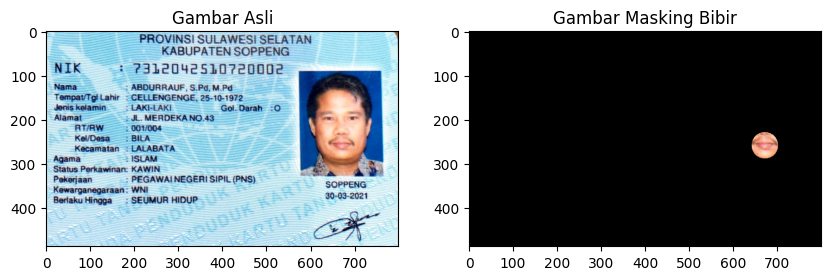

In [ ]:
ktp_image = cv.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg')

# Membuat masking bulat (circle) untuk gambar kanan
height, width, _ = ktp_image.shape
print(ktp_image.shape)
mask = np.zeros((height, width), dtype=np.uint8)

# Membuat lingkaran di koordinat tertentu (atur berdasarkan kebutuhan)
# Contoh untuk kelompok 1 dan 2
cv.circle(mask, (width - 130, height // 2 + 15), 30, 255, -1)

# masking dengan operasi AND
masked_image = cv.bitwise_and(ktp_image, ktp_image, mask=mask)

# Menampilkan gambar asli dan hasil masking
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ktp_image, cv.COLOR_BGR2RGB))
plt.title("Gambar Asli")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(masked_image, cv.COLOR_BGR2RGB))
plt.title("Gambar Masking Bibir")
plt.show()

### Gambar 4: Mata

(488, 800, 3)


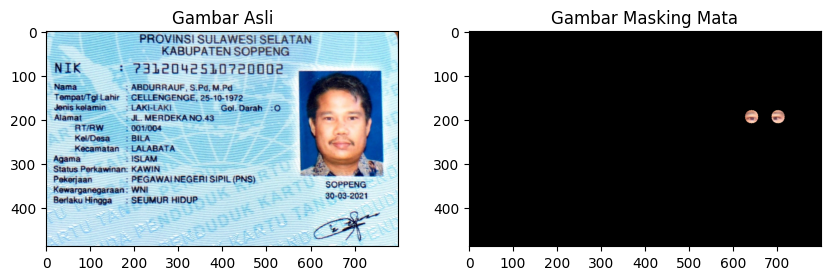

In [ ]:
ktp_image = cv.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg')

# Membuat masking bulat (circle) untuk gambar kanan
height, width, _ = ktp_image.shape
print(ktp_image.shape)
mask = np.zeros((height, width), dtype=np.uint8)

# Membuat lingkaran di koordinat tertentu (atur berdasarkan kebutuhan)
# Contoh untuk kelompok 1 dan 2
cv.circle(mask, (width - 160, height // 2 - 50), 15, 255, -1)
cv.circle(mask, (width - 100, height // 2 - 50), 15, 255, -1)

# masking dengan operasi AND
masked_image = cv.bitwise_and(ktp_image, ktp_image, mask=mask)

# Menampilkan gambar asli dan hasil masking
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ktp_image, cv.COLOR_BGR2RGB))
plt.title("Gambar Asli")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(masked_image, cv.COLOR_BGR2RGB))
plt.title("Gambar Masking Mata")
plt.show()

### Gambar 5: Telinga

(488, 800, 3)


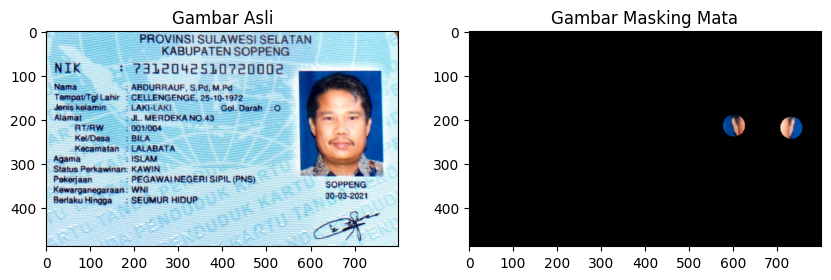

In [ ]:
ktp_image = cv.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg')

# Membuat masking bulat (circle) untuk gambar kanan
height, width, _ = ktp_image.shape
print(ktp_image.shape)
mask = np.zeros((height, width), dtype=np.uint8)

# Membuat lingkaran di koordinat tertentu (atur berdasarkan kebutuhan)
# Contoh untuk kelompok 1 dan 2
cv.circle(mask, (width - 200, height // 2 - 30), 25, 255, -1)
cv.circle(mask, (width - 70, height // 2 - 25), 25, 255, -1)

# masking dengan operasi AND
masked_image = cv.bitwise_and(ktp_image, ktp_image, mask=mask)

# Menampilkan gambar asli dan hasil masking
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(ktp_image, cv.COLOR_BGR2RGB))
plt.title("Gambar Asli")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(masked_image, cv.COLOR_BGR2RGB))
plt.title("Gambar Masking Mata")
plt.show()

## 5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.

### Operator NOT (komplemen)

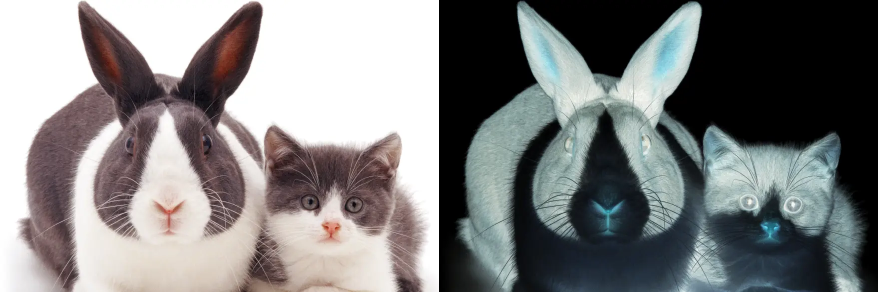

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/cats_and_bunnies.jpg')
img = cv.resize(img, (0, 0), fx=0.5, fy=0.5)

# Operator Not
img_not = cv.bitwise_not(img)

# Menampilkan hasil
final_image = cv.hconcat((img,img_not))
cv2_imshow(final_image)

### Operator OR (Atau)

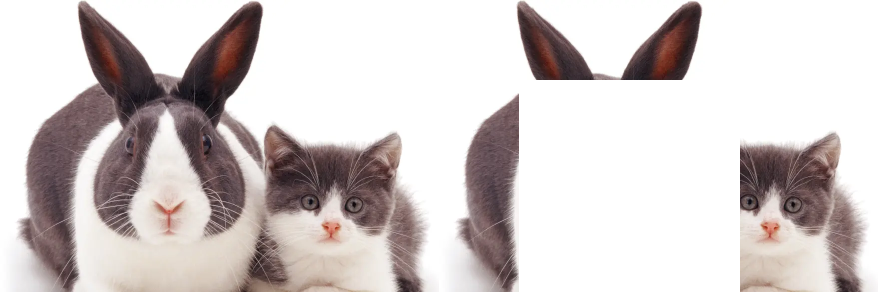

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/cats_and_bunnies.jpg')
img = cv.resize(img, (0, 0), fx=0.5, fy=0.5)

img_2 = np.zeros(img.shape, img.dtype)
cv.rectangle(img_2, (80, 80), (300, 300), (255, 255, 255), -1)

# Operator OR antara dua gambar
img_or = cv.bitwise_or(img,img_2)

# Menampilkan hasil
final_image = cv.hconcat((img,img_or))
cv2_imshow(final_image)

### Operator AND (Dan)

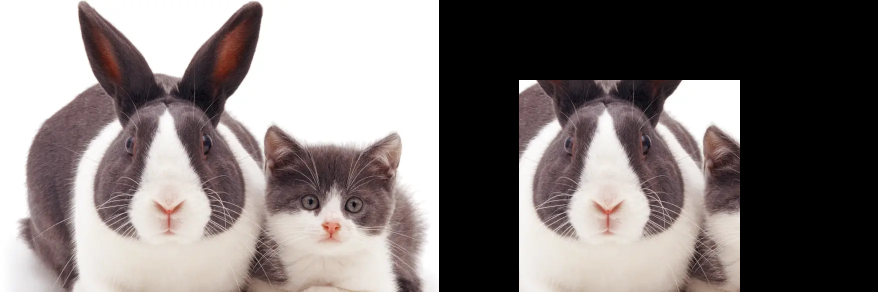

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/cats_and_bunnies.jpg')
img = cv.resize(img, (0, 0), fx=0.5, fy=0.5)

img_2 = np.zeros(img.shape, img.dtype)
cv.rectangle(img_2, (80, 80), (300, 300), (255, 255, 255), -1)

# Operator and antara dua gambar
img_or = cv.bitwise_and(img,img_2)

# Menampilkan hasil
final_image = cv.hconcat((img,img_or))
cv2_imshow(final_image)

### Operator NAND (Not And)

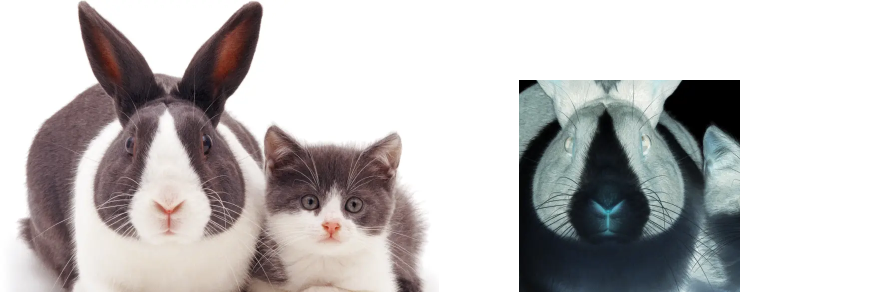

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/cats_and_bunnies.jpg')
img = cv.resize(img, (0, 0), fx=0.5, fy=0.5)

img_2 = np.zeros(img.shape, img.dtype)
cv.rectangle(img_2, (80, 80), (300, 300), (255, 255, 255), -1)

# Operator AND antara dua gambar
img_and = cv.bitwise_and(img, img_2)

# Operator NOT dari hasil AND
img_nand = cv.bitwise_not(img_and)

# Menampilkan hasil
final_image = cv.hconcat((img, img_nand))
cv2_imshow(final_image)

### Operator XOR (Exlusive Or)

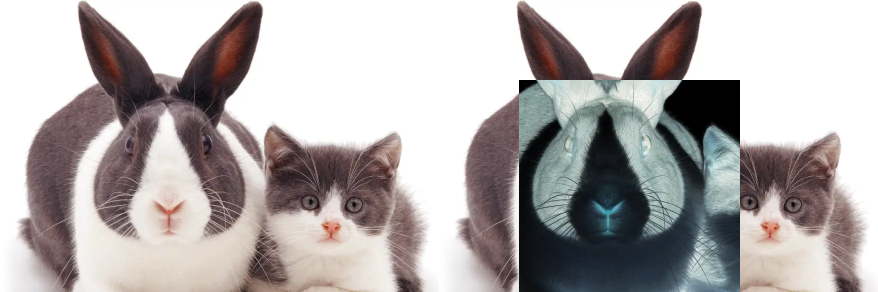

In [ ]:
# Memuat gambar asli
img = cv.imread('/content/drive/MyDrive/PCVK/cats_and_bunnies.jpg')
img = cv.resize(img, (0, 0), fx=0.5, fy=0.5)

img_2 = np.zeros(img.shape, img.dtype)
cv.rectangle(img_2, (80, 80), (300, 300), (255, 255, 255), -1)

# Operator XOR antara dua gambar
img_xor = cv.bitwise_xor(img, img_2)

# Menampilkan hasil
final_image = cv.hconcat((img, img_xor))
cv2_imshow(final_image)

**Hasil analisa**:
1. Operator NOT:
 > Hasil dari Operator bitwise NOT pada percobaan diatas mengubah setiap piksel menjadi kebalikannya (inversi). Seperti pada gambar awalnya yang berwarna putih menjadi hitam atau gelap. Penggunaan operator NOT ini dapat berguna untuk pendeteksian tepi.

2. Operator OR:
> Hasil dari Operator bitwise OR pada percobaan diatas menyorot area yang dipilih (kotak putih) sambil tetap mempertahankan informasi dari gambar asli di luar area tersebut. Penggunaan operator OR ini dapat berguna untuk menyoroti atau memodifikasi bagian spesifik dari gambar tanpa mengubah keseluruhan gambar.

3. Operator AND:
> Hasil dari Operator bitwise AND pada percobaan diatas pada bagian dalam kotak putih di gambar kedua yang sesuai dengan area gambar asli tetap terlihat, sedangkan bagian luar kotak putih menjadi hitam karena piksel dari gambar kedua adalah hitam, sehingga operasi AND menghasilkan hitam (nilai 0). Operasi bitwise AND digunakan untuk mempertahankan bagian gambar yang berada dalam kotak putih, sementara bagian luar kotak menjadi hitam.

4. Operator NAND:
> Operator NAND adalah kebalikan dari AND. Piksel hasil AND dibalik menggunakan operasi NOT. Operator NAND hasilnya akan lebih terang di area di luar kotak (tempat nilai piksel antara dua gambar tidak sama), sementara bagian dalam kotak putih yang menutupi sebagian kelinci akan menjadi lebih gelap dibandingkan dengan gambar asli. Operator ini dapat digunakan untuk deteksi perubahan atau area di mana dua gambar berbeda secara signifikan.

5. Operator XOR:
> Hasil dari Operator bitwise XOR pada percobaan diatas bagian kelinci yang terkena kotak persegi putih menghasilkan efek seperti "negatif" atau perubahan warna, sedangkan area di luar kotak menjadi hitam karena piksel yang sama tidak berubah. Citra hasil XOR hanya menyoroti perbedaan antara dua citra. Jika dua citra memiliki area yang sama, area tersebut akan menjadi gelap (hitam)
Penggunaan XOR ini dapat digunakan dalam pemrosesan gambar untuk melacak perubahan atau mencari area yang tidak serupa.
